# (Core) Project 4 - Part 1

#### Author: Parris Trimingham

## INSTRUCTIONS
For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.

 - For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
 - You will then answer provided stakeholder questions and support your answers with visualizations.

 ## Chicago Crime Data

- Source: Chicago Data Portal: Crimes 2001 to Present
 - Data Description:
All Crimes that were reported in the city of Chicago and their details
View Preview
 - Includes:
type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.
 - Note: the .csv is very large and needs to be processed into smaller files to fit inside a GitHub repository. We have provided a helper notebook below to process your downloaded file into a repo-friendly format.

- Data Processing Helper Notebook:
 - Use the helper notebook in this repository to process your manually-downloaded .csv into several .csv.gz files: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
 - You can either Fork your own copy of the repository and rename it to be your "Project 4" repository, or you can download the notebook and save it in your own repository.
- Supplemental Data: Holiday Data

 - Check the lesson on "Feature Engineering: Holidays" to see how to use the Python 'holidays' package to add holidays to your dataset.

- Notes/Considerations:
 - You may need to keep 2 forms of the data:
The original individual crime data with a datetime index. (Each row is 1 crime)
A resampled/converted crime counts version (Each row is 1 day)

## Task

Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:

- Topic 1) Comparing Police Districts:
Which district has the most crimes? Which has the least?

- Topic 2) Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

- Topic 3) Comparing AM vs. PM Rush Hour:
Are crimes more common during AM rush hour or PM rush hour?
You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
You can consider any crime that occurred between 4 -7 PM as PM rush hour.
What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

- Topic 4) Comparing Months:
What months have the most crime? What months have the least?
Are there any individual crimes that do not follow this pattern? If so, which crimes?

- Topic 5) Comparing Holidays:
Are there any holidays that show an increase in the # of crimes?
Are there any holidays that show a decrease in the # of crimes?


## Load Libraries/Data

In [2]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz
#all_tzs = pytz.all_timezones
#len(all_tzs)

# import the statsmodels time series analysis api module
# seasonal decompose
import statsmodels.tsa.api as tsa

# get peaks (max point) of each season
from scipy.signal import find_peaks
import datetime as dt

import glob


import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv'
df = pd.read_csv(url)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856929,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7856930,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7856931,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7856932,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7856934 entries, 0 to 7856933
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
# Print first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [6]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7856934 entries, 0 to 7856933
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

## Features

In [8]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.0,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


## Convert 'Date' to datetime dtype

In [9]:
fmt = '%m/%d/%Y %I:%M:%S %p'

In [10]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [11]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01 00:25:00
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN,2017-01-01 00:01:00
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.0,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-12-15 02:00:00
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2015-02-02 10:00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7856934 entries, 0 to 7856933
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  object        
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

## Set 'Datetime' As Index

In [13]:
df = df.set_index('Datetime')
df.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN


## Remove Unnecessary Columns

In [14]:
df.drop(columns=['Latitude', 'Longitude', 'Date'], inplace=True)
df.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
Datetime,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN


# Task

## Comparing Police Districts:
- Which district has the most crimes?

 - District 8 has the most crime with 527,600 counts
- Which has the least?

 - District 21 has the least with 4 counts

In [15]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['THEFT' 'DECEPTIVE PRACTICE' 'SEX OFFENSE' 'BATTERY' 'CRIMINAL DAMAGE'
 'NARCOTICS' 'OTHER OFFENSE' 'PUBLIC PEACE VIOLATION'
 'CRIM SEXUAL ASSAULT' 'BURGLARY' 'LIQUOR LAW VIOLATION'
 'CRIMINAL SEXUAL ASSAULT' 'OFFENSE INVOLVING CHILDREN'
 'CRIMINAL TRESPASS' 'WEAPONS VIOLATION' 'ROBBERY' 'MOTOR VEHICLE THEFT'
 'ASSAULT' 'OBSCENITY' 'INTERFERENCE WITH PUBLIC OFFICER'
 'HUMAN TRAFFICKING' 'ARSON' 'GAMBLING' 'PROSTITUTION' 'NON-CRIMINAL'
 'INTIMIDATION' 'STALKING' 'KIDNAPPING'
 'CONCEALED CARRY LICENSE VIOLATION' 'HOMICIDE' 'OTHER NARCOTIC VIOLATION'
 'RITUALISM' 'PUBLIC INDECENCY' 'NON - CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'DOMESTIC VIOLENCE']


36

## Remove 'NON-CRIMINAL' Primary Types

In [16]:
non_crime = df['Primary Type'].str.startswith('NON')

In [17]:
df1 = df[~non_crime]
df1

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
Datetime,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN
2001-12-15 02:00:00,1896258,G749215,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.0,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN
2015-02-02 10:00:00,11645527,JC212744,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 20:00:00,13128007,JG325985,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,14.0,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,"(41.937925817, -87.697782474)"
2023-06-20 04:00:00,13129172,JG327619,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.0,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,"(41.932798095, -87.691589364)"
2023-06-06 15:42:00,13128066,JG325838,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,2532,25.0,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,"(41.914487492, -87.758185241)"


In [18]:
len(df1['Primary Type'].unique())

33

## Get Counts of Districts

In [19]:
plot_1 = df1['District'].value_counts().sort_values()
plot_1

21.0         4
31.0       246
20.0    139110
17.0    226735
24.0    237601
22.0    257400
16.0    263136
14.0    303811
1.0     318416
15.0    336129
10.0    338556
5.0     347864
18.0    352796
19.0    353208
2.0     372299
9.0     383605
12.0    389850
3.0     398452
4.0     446151
25.0    446709
7.0     453484
6.0     459538
11.0    503862
8.0     527695
Name: District, dtype: int64

In [20]:
plot_1.values.sum()

7856657

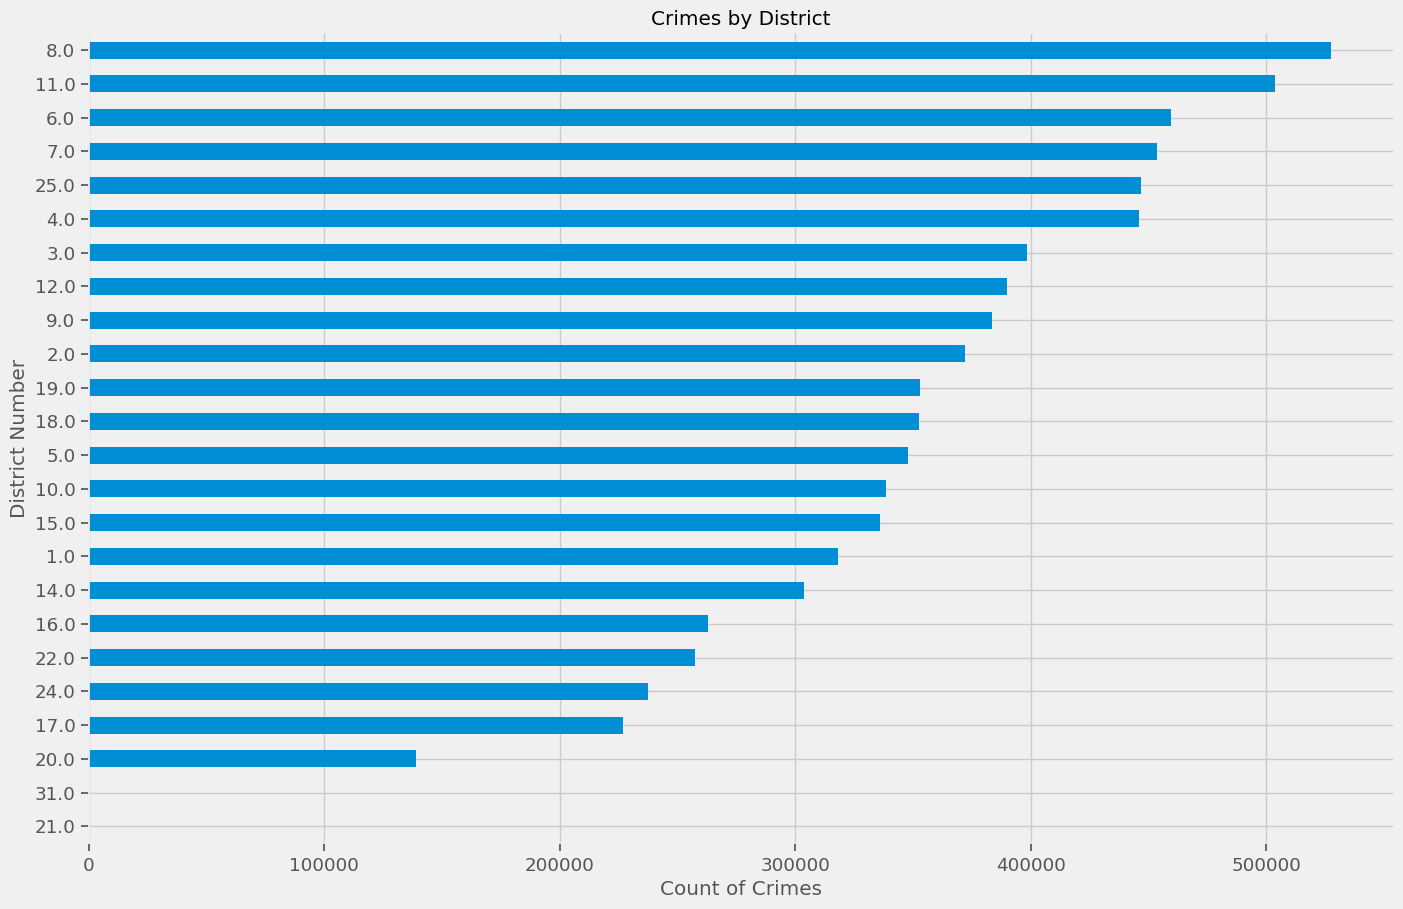

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_1.plot(kind='barh')

plt.xlabel('Count of Crimes')
plt.ylabel('District Number')
plt.title('Crimes by District');

## Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?

  From 2001 to 2023, crime has decreased.

- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

  Seems to be some crimes have trended up, in contrast to the general trend down:

 - 'CONCEALED CARRY LICENSE VIOLATION'
 - 'DECEPTIVE PRACTICES'
 - 'HOMICIDE'
 - 'HUMAN TRAFFICKING'
 - 'VEHICLE THEFT' (very recently has spiked)
 - 'OBSCENITY'
 - 'STALKING'
 - 'WEAPONS VIOLATION'

### Crimes Increasing or Decreasing Spanning Years

In [22]:
df2 = df[~non_crime]

In [23]:
df2['Year'] = df2.index.year

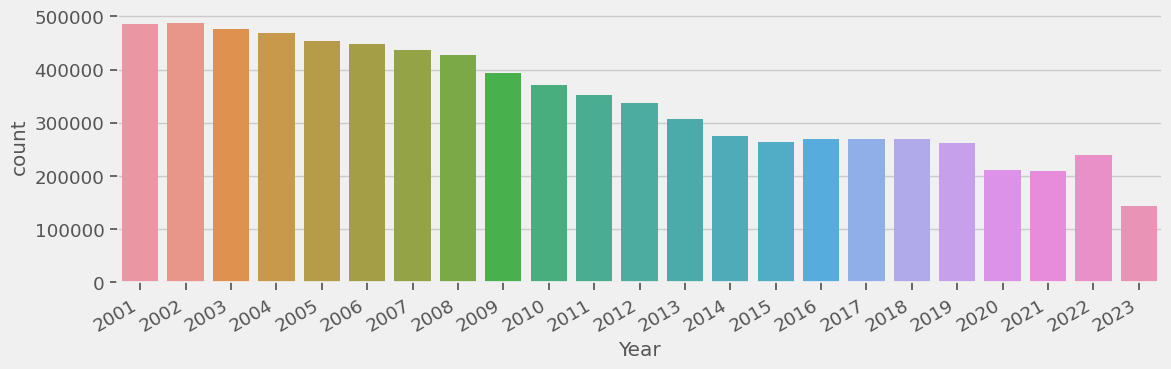

In [24]:
# Visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [25]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    144332
2022    238737
2021    208759
2020    212176
2019    261292
2018    268780
2017    269060
2016    269759
2015    264741
2014    275721
2013    307472
2012    336268
2011    351975
2010    370505
2009    392825
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475983
2002    486806
2001    485885
Name: Year, dtype: int64

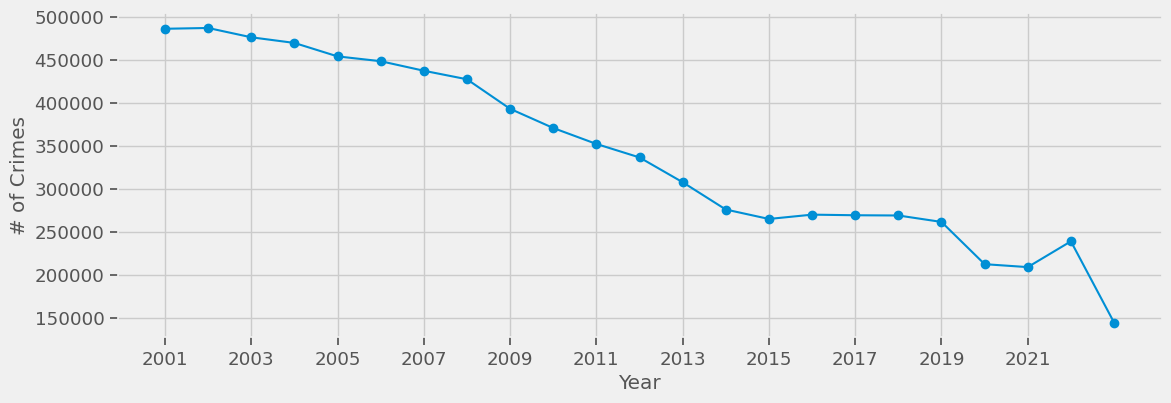

In [26]:
# Save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

### Overall Trend of Crimes

In [27]:
df2

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
Datetime,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN
2001-12-15 02:00:00,1896258,G749215,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.0,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN
2015-02-02 10:00:00,11645527,JC212744,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 20:00:00,13128007,JG325985,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,14.0,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,"(41.937925817, -87.697782474)"
2023-06-20 04:00:00,13129172,JG327619,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.0,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,"(41.932798095, -87.691589364)"
2023-06-06 15:42:00,13128066,JG325838,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,2532,25.0,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,"(41.914487492, -87.758185241)"


In [28]:
plot_type = df2.groupby('Primary Type').resample('M').size()

In [29]:
plot_type = plot_type.unstack().T
plot_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,162.0,3966.0,3.0,1192.0,1398.0,1.0,44.0,42.0,NaN,36.0,18.0,75.0,101.0,2097.0,4714.0,2.0,246.0,1.0,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1163.0,NaN,37.0,27.0,NaN,27.0,24.0,57.0,109.0,1785.0,4369.0,1.0,152.0,0.0,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4617.0,4.0,1141.0,1313.0,NaN,55.0,37.0,NaN,22.0,22.0,72.0,147.0,2151.0,4862.0,2.0,195.0,0.0,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,NaN,79.0,59.0,NaN,34.0,21.0,49.0,164.0,2120.0,4044.0,2.0,196.0,0.0,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,155.0,4757.0,2.0,1067.0,1261.0,NaN,94.0,42.0,NaN,41.0,25.0,56.0,194.0,2197.0,4038.0,1.0,213.0,2.0,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,29.0,1755.0,3404.0,570.0,17.0,NaN,2320.0,111.0,440.0,1480.0,NaN,1.0,37.0,2.0,61.0,30.0,6.0,24.0,2320.0,398.0,4.0,151.0,NaN,1394.0,7.0,0.0,66.0,NaN,685.0,102.0,38.0,4446.0,631.0
2023-04-30,36.0,1807.0,3600.0,594.0,12.0,NaN,2430.0,121.0,363.0,1400.0,NaN,0.0,55.0,0.0,51.0,20.0,5.0,10.0,2284.0,322.0,2.0,161.0,NaN,1222.0,5.0,0.0,82.0,NaN,752.0,112.0,38.0,4329.0,688.0
2023-05-31,54.0,2013.0,3948.0,612.0,9.0,NaN,2580.0,147.0,389.0,1283.0,NaN,0.0,64.0,0.0,45.0,22.0,22.0,19.0,2426.0,332.0,4.0,169.0,NaN,1223.0,5.0,2.0,81.0,NaN,771.0,127.0,40.0,4686.0,820.0


In [30]:
plot_type = plot_type.fillna(0.0)
plot_type.isna().sum().sum()

0

### Yearly Trend of Crimes

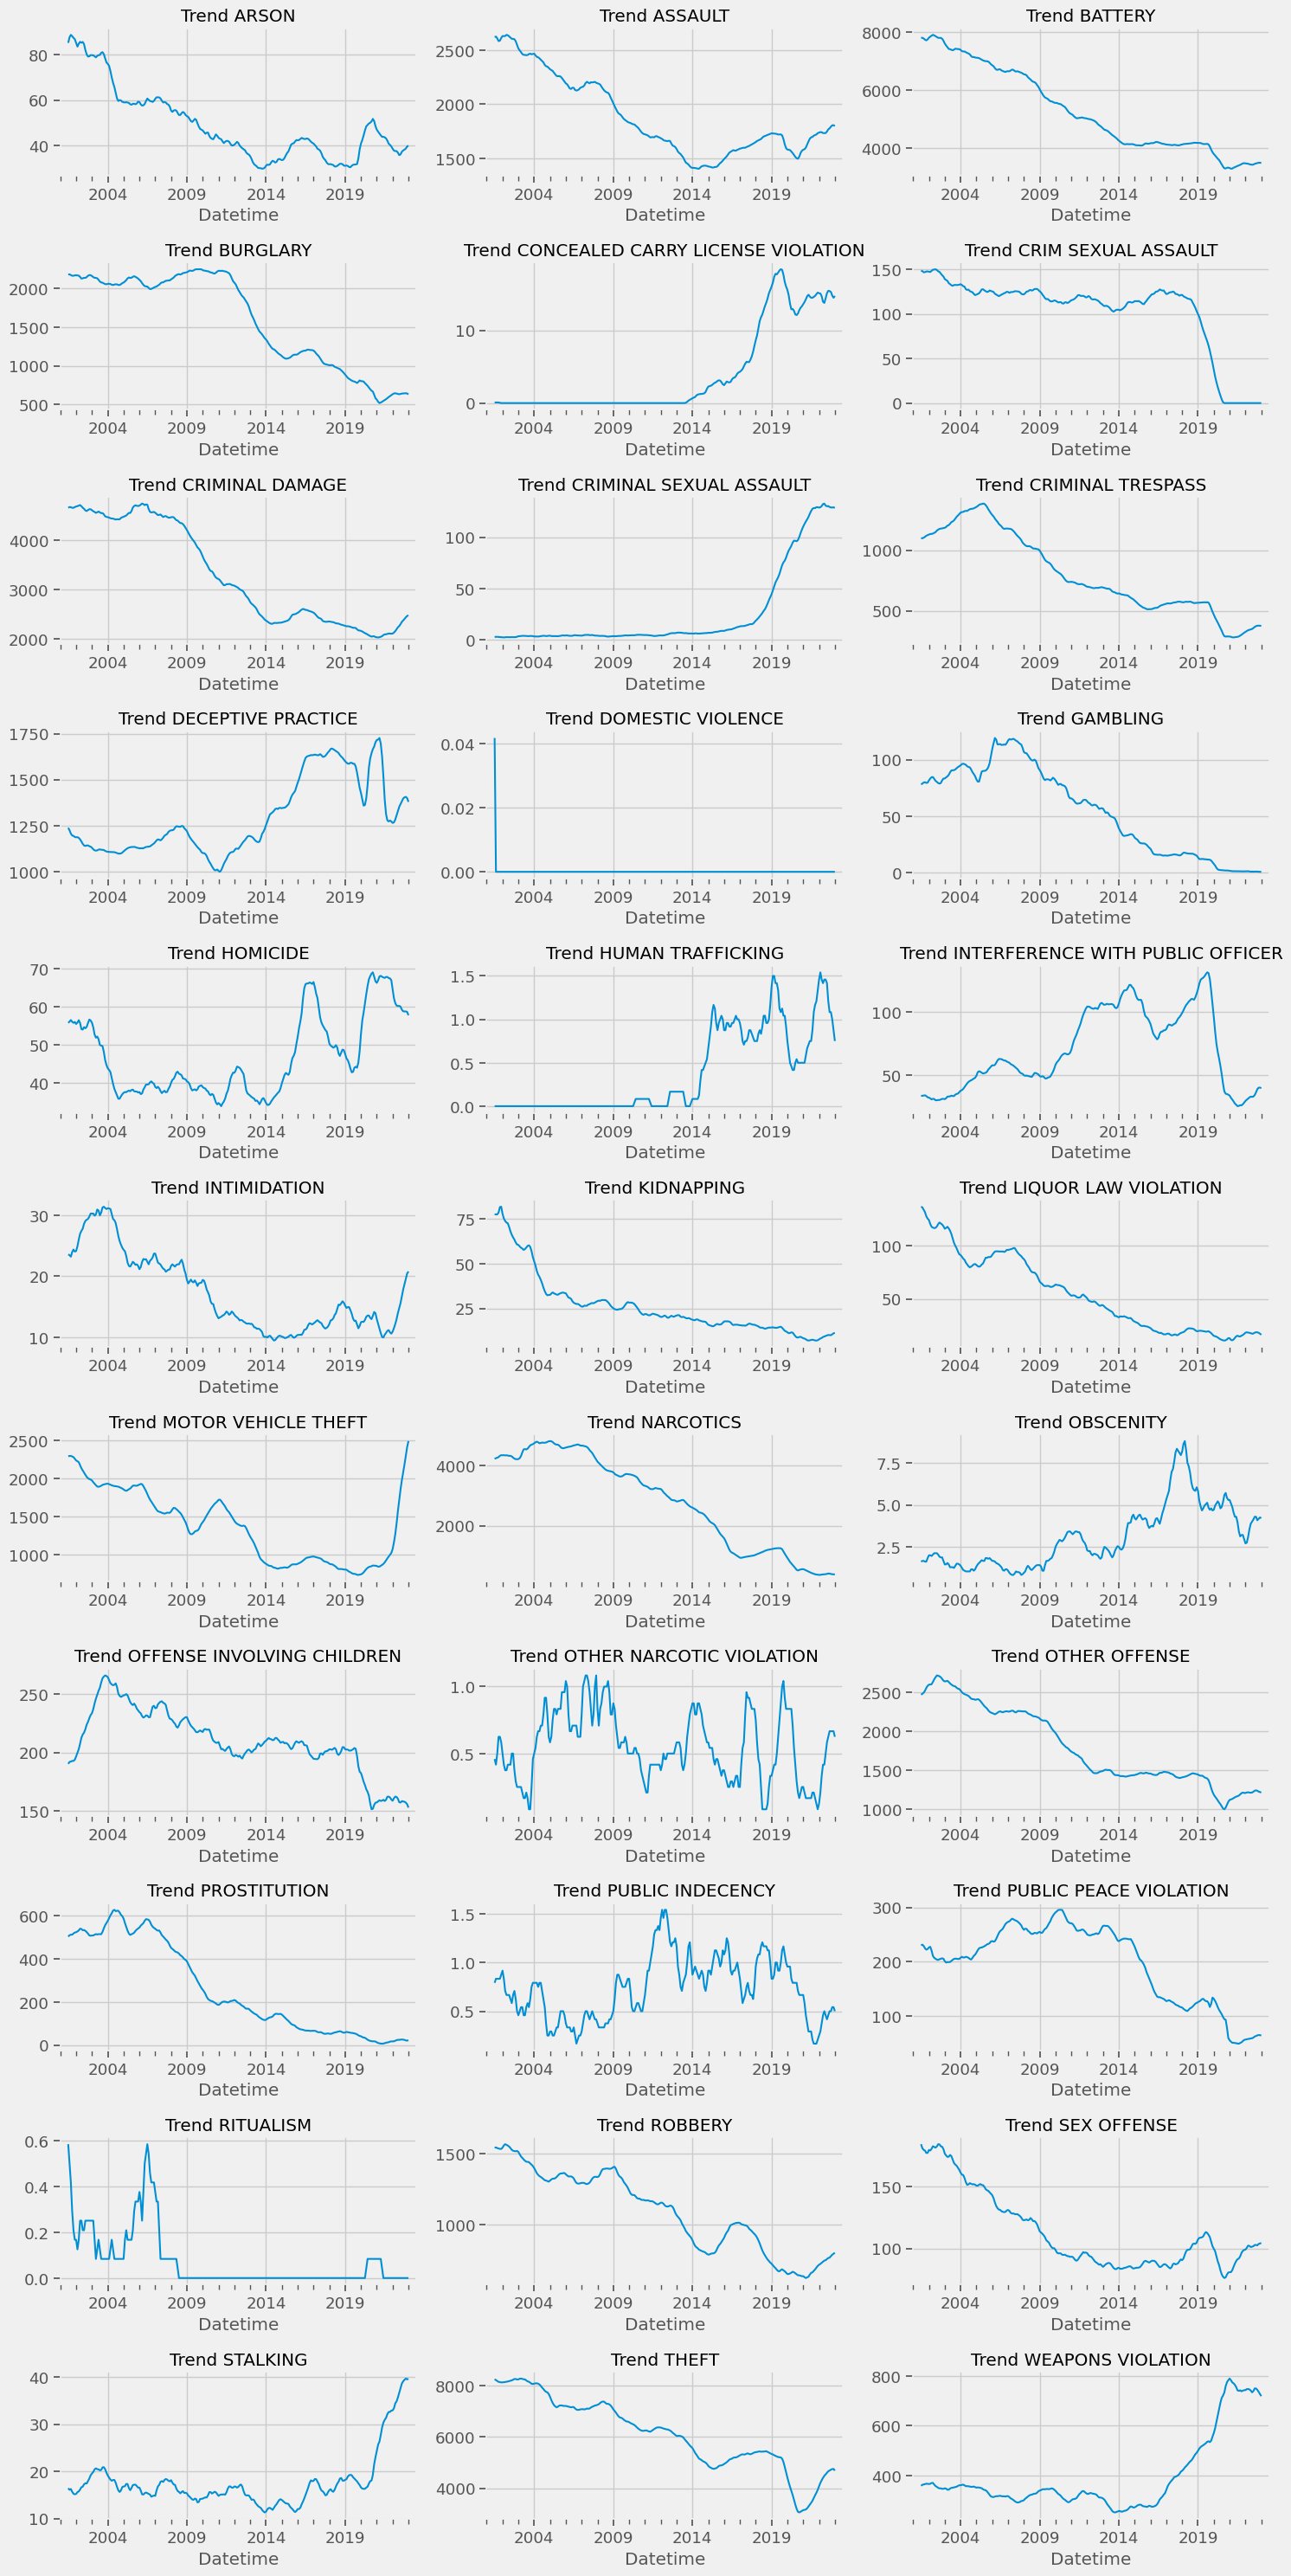

In [31]:
fig, axes = plt.subplots(11, 3, figsize=(15,30))

for indx, crime in enumerate(plot_type.columns):
    row = indx // 3
    col = indx % 3
    ts = plot_type[crime]
    decomp = tsa.seasonal_decompose(ts)

    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout()

## Comparing AM vs. PM Rush Hour

Are crimes more common during AM rush hour or PM rush hour?
- You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
- You can consider any crime that occurred between 4 -7 PM as PM rush hour.

What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

## Comparing Months:

- What months have the most crime? What months have the least?

 - The most crime seems to occur during the Summer months (May to August)
 - The least crime occurs during the Winter months (November to February)

- Are there any individual crimes that do not follow this pattern? If so, which crimes?

 - Some Crimes do seem to buck the overall trend (does not create a distinct "hump" during the Summer Months)

 - 'DECEPTIVE PRACTICE'
 - 'NARCOTICS' (has more of a continuous downward trend)
 - 'OBSCENITY'
 - 'OFFENSE INVOLVING CHILDREN'
 - 'RITUALISM' (drops substantially April to July and spikes in August)

In [32]:
df4 = df[~non_crime]

In [33]:
df4['Month'] = df4.index.month
df4['MonthName'] = df4.index.month_name()
df4.head(4)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,9,September
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,5,May
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,1,January
2001-12-15 02:00:00,1896258,G749215,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.0,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,12,December


In [34]:
# saving lookup for number vs name
unique_months = df4.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

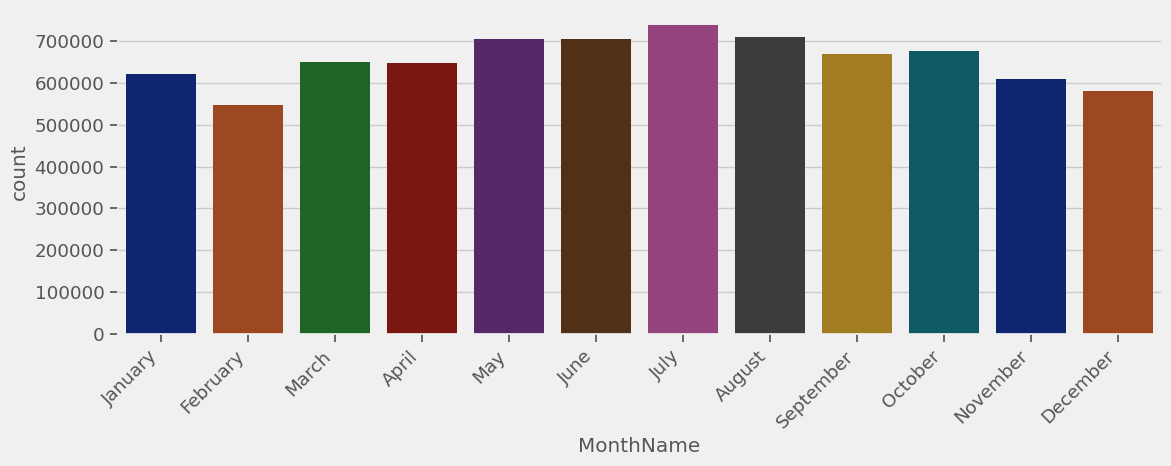

In [35]:
ax = sns.countplot(data=df4, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Visualization Count of Crimes per Month

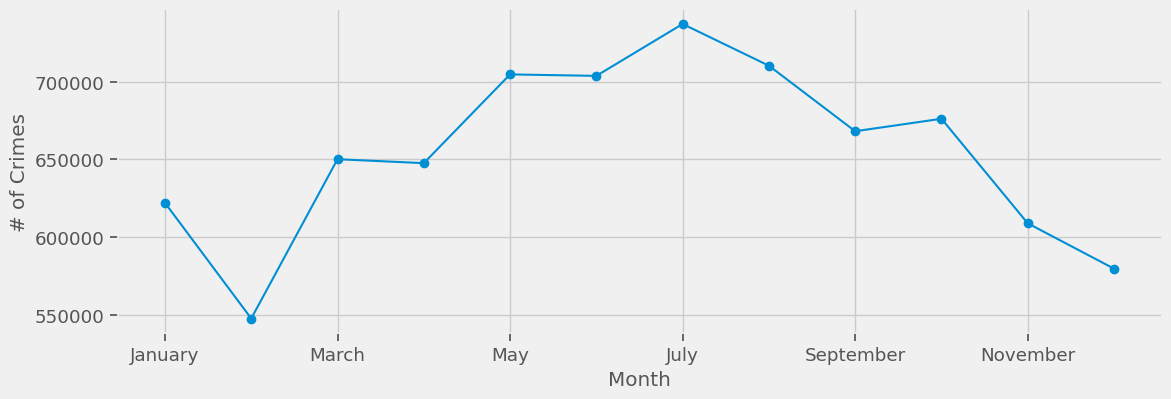

In [36]:
# month_lookup.values() will reorder df['MonthName'].value_counts() by month
month_counts = df4['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### Crimes Going Against Monthly Trend

In [37]:
df4

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,9,September
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,5,May
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,1,January
2001-12-15 02:00:00,1896258,G749215,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.0,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,12,December
2015-02-02 10:00:00,11645527,JC212744,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,2,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 20:00:00,13128007,JG325985,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,14.0,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,"(41.937925817, -87.697782474)",6,June
2023-06-20 04:00:00,13129172,JG327619,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.0,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,"(41.932798095, -87.691589364)",6,June
2023-06-06 15:42:00,13128066,JG325838,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,2532,25.0,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,"(41.914487492, -87.758185241)",6,June


In [39]:
df4.index

DatetimeIndex(['2018-09-01 00:01:00', '2016-05-01 00:25:00',
               '2017-01-01 00:01:00', '2001-12-15 02:00:00',
               '2015-02-02 10:00:00', '2001-01-01 11:00:00',
               '2015-09-03 18:00:00', '2018-07-31 13:30:00',
               '2018-01-01 08:00:00', '2017-10-13 09:00:00',
               ...
               '2021-04-01 00:00:00', '2015-11-03 12:00:00',
               '2021-12-19 14:30:00', '2023-06-25 03:00:00',
               '2023-06-28 18:00:00', '2023-06-21 20:00:00',
               '2023-06-20 04:00:00', '2023-06-06 15:42:00',
               '2023-05-13 12:00:00', '2023-06-24 13:29:00'],
              dtype='datetime64[ns]', name='Datetime', length=7856704, freq=None)

In [40]:
plot_type4 = df4.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
plot_type4

Primary Type       Month  MonthName
ARSON              1      January       963
                   2      February      840
                   3      March        1140
                   4      April        1134
                   5      May          1284
                                       ... 
WEAPONS VIOLATION  8      August       9887
                   9      September    9435
                   10     October      9190
                   11     November     7952
                   12     December     7401
Length: 384, dtype: int64

In [41]:
plot_type4_df = plot_type4.to_frame('# of Crimes').reset_index()
plot_type4_df

,Primary Type,Month,MonthName,# of Crimes
0,ARSON,1,January,963
1,ARSON,2,February,840
2,ARSON,3,March,1140
3,ARSON,4,April,1134
4,ARSON,5,May,1284
...,...,...,...,...
379,WEAPONS VIOLATION,8,August,9887
380,WEAPONS VIOLATION,9,September,9435
381,WEAPONS VIOLATION,10,October,9190
382,WEAPONS VIOLATION,11,November,7952


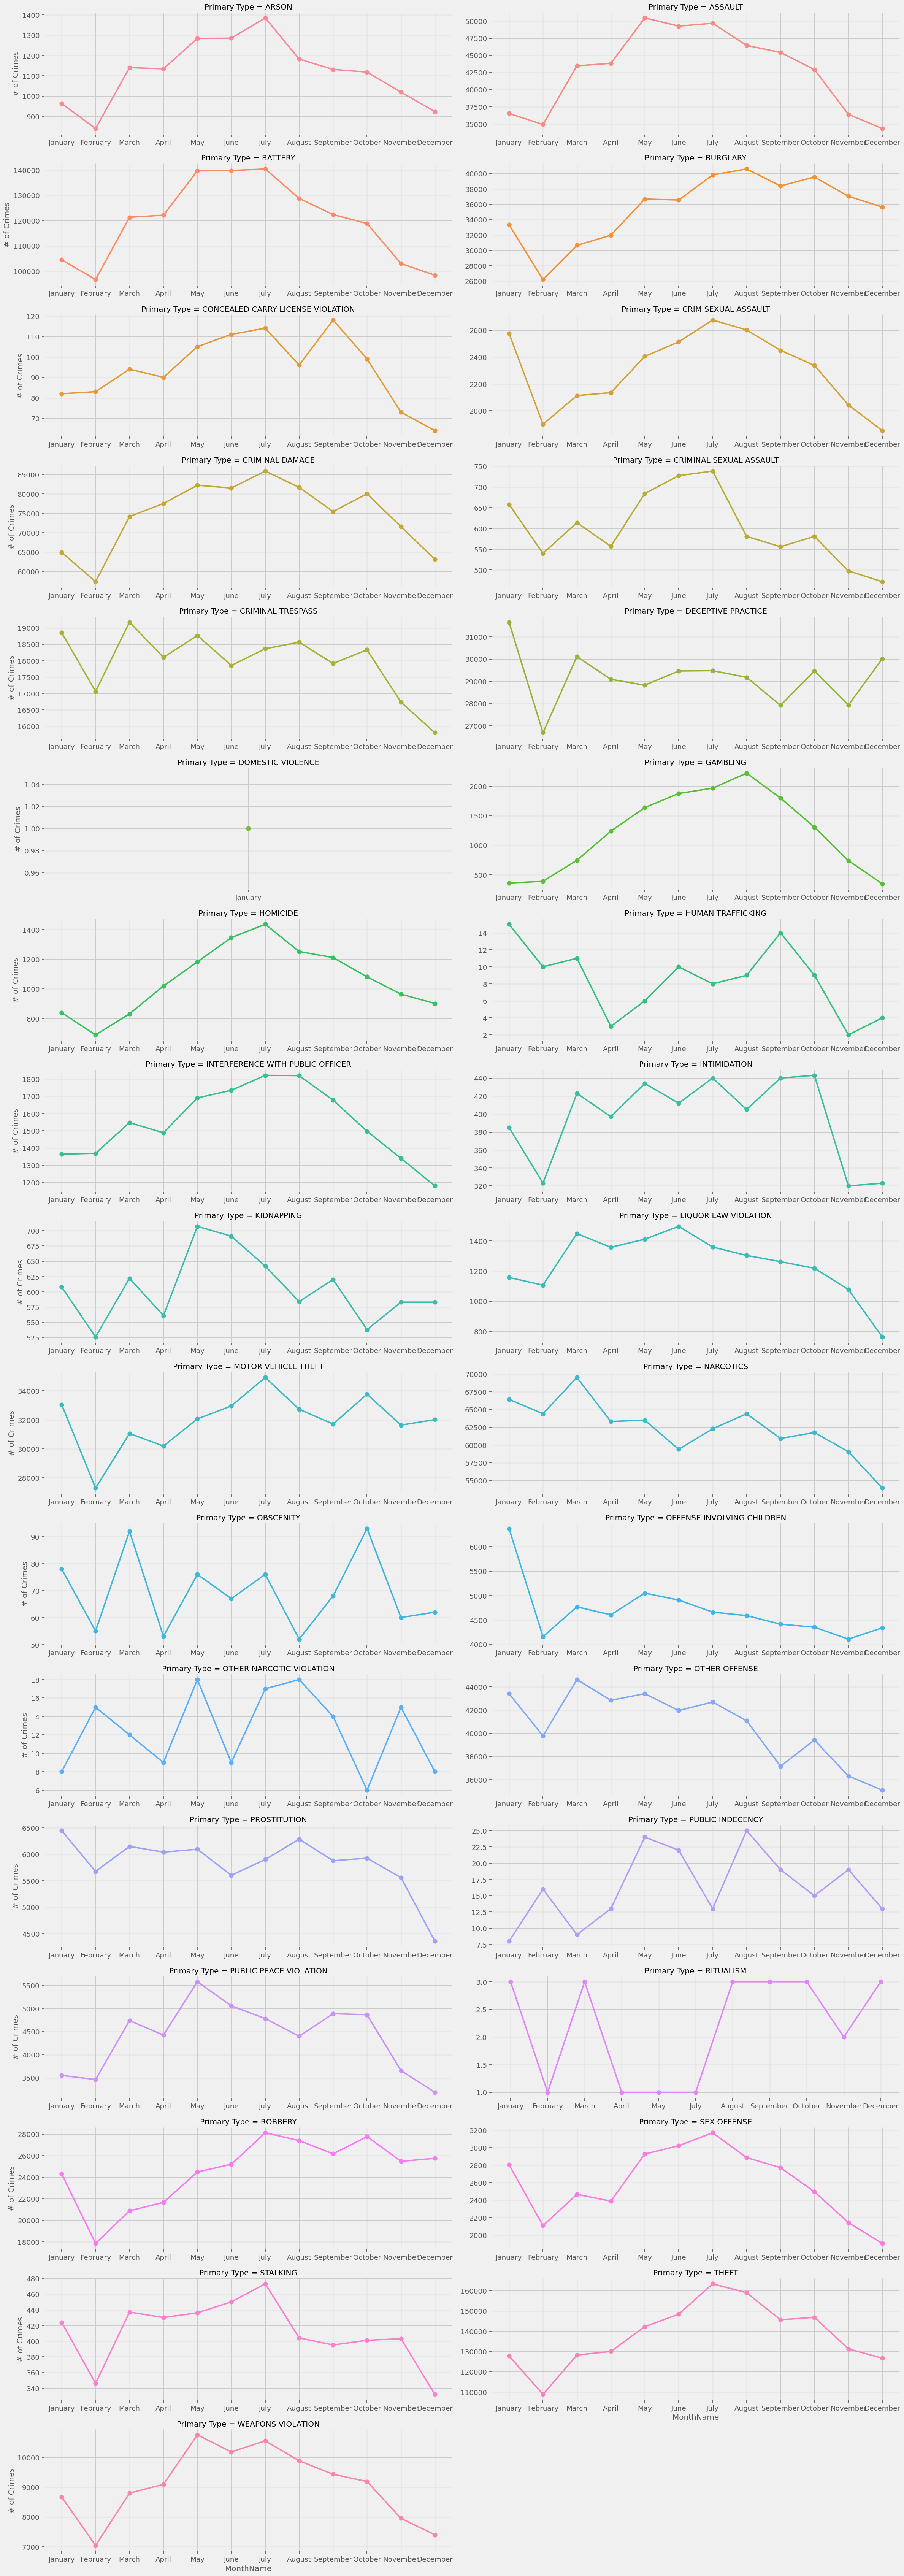

In [42]:
g = sns.catplot(data=plot_type4_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

## Comparing Holidays:

Are there any holidays that show an increase in the # of crimes?

Are there any holidays that show a decrease in the # of crimes?